# Chapter 3: Demo Logistic Regression - Buy car?
- Xây dựng model dự đoán một khách hàng có mua xe hay không dựa trên thông tin về ‘Age’ và ‘EstimatedSalary_K’ (mức lương ước tính – đơn vị tính 1000$)

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [40]:
# Dataset: https://www.kaggle.com/rakeshrau/social-network-ads

In [41]:
data = pd.read_csv("Social_Network_Ads.csv", 
                   usecols=['Age', 'EstimatedSalary_K', 'Purchased'])

In [ ]:
data.info()

In [42]:
data.head()

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [ ]:
data.describe()

In [43]:
X = data[['Age', 'EstimatedSalary_K']]
X.head()

,Age,EstimatedSalary_K
0,19,19
1,35,20
2,26,43
3,27,57
4,19,76


In [44]:
Y = data['Purchased']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split   

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression()

In [49]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Tính toán xác suất của lớp cho tập dữ liệu thử nghiệm 
# bằng cách sử dụng hàm ‘predict_proba’.
# clf.predict_proba(X_test)

In [50]:
print('Train score: ', clf.score(X_train,Y_train))

Train score:  0.8142857142857143


In [51]:
print('Test score: ', clf.score(X_test,Y_test))

Test score:  0.9083333333333333


In [59]:
from sklearn.metrics import accuracy_score 
Yhat_test = clf.predict(X_test)
clf.predict_proba(X_test)
#print("Test Accuracy is ", accuracy_score(Y_test,Yhat_test)*100,"%") 

array([[0.53557617, 0.46442383],
       [0.98379486, 0.01620514],
       [0.03330333, 0.96669667],
       [0.18590454, 0.81409546],
       [0.26403102, 0.73596898],
       [0.70449527, 0.29550473],
       [0.7104265 , 0.2895735 ],
       [0.68869073, 0.31130927],
       [0.03954434, 0.96045566],
       [0.23703097, 0.76296903],
       [0.00413376, 0.99586624],
       [0.58499917, 0.41500083],
       [0.71961256, 0.28038744],
       [0.82162874, 0.17837126],
       [0.83997532, 0.16002468],
       [0.30115389, 0.69884611],
       [0.00540761, 0.99459239],
       [0.09488944, 0.90511056],
       [0.99525549, 0.00474451],
       [0.94715867, 0.05284133],
       [0.0764242 , 0.9235758 ],
       [0.02077035, 0.97922965],
       [0.58300404, 0.41699596],
       [0.71357965, 0.28642035],
       [0.87050155, 0.12949845],
       [0.82439045, 0.17560955],
       [0.56144877, 0.43855123],
       [0.71357965, 0.28642035],
       [0.99774817, 0.00225183],
       [0.98660923, 0.01339077],
       [0.

In [55]:
cm = confusion_matrix(Y_test, Yhat_test)
cm

array([[78,  3],
       [ 8, 31]], dtype=int64)

In [ ]:
Yhat_train = clf.predict(X_train)

In [56]:
clf.intercept_

array([-10.68621929])

In [57]:
clf.coef_

array([[0.19615445, 0.03328948]])

In [ ]:

#tuong ung voi intercept, 

### Trực quan hóa 1

In [60]:
import seaborn as sns

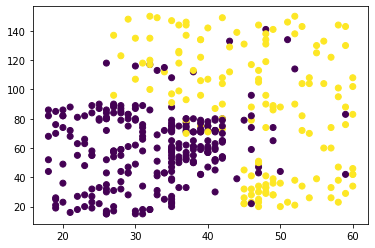

In [61]:
plt.scatter(X.Age , X.EstimatedSalary_K, c= Y)

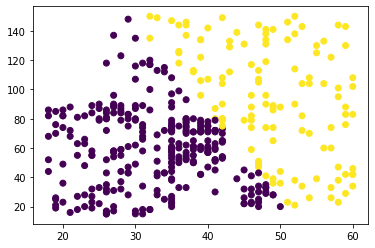

In [65]:
plt.scatter(X.Age , X.EstimatedSalary_K, c= clf.predict(X))

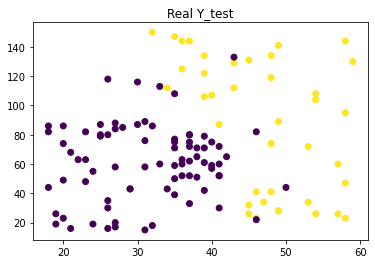

In [66]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, 
            c=Y_test)
plt.title('Real Y_test')
plt.show()

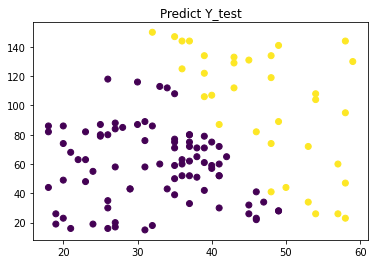

In [67]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, 
            c=Yhat_test)
plt.title('Predict Y_test')
plt.show()

### Trực quan hóa 2

In [68]:
from matplotlib.colors import ListedColormap

In [69]:
X_set, Y_set = X_test, Y_test

In [70]:
X_set.head()

,Age,EstimatedSalary_K
383,49,28
155,31,15
316,54,104
297,43,112
339,39,122


In [71]:
np.unique(Y_set)

array([0, 1], dtype=int64)

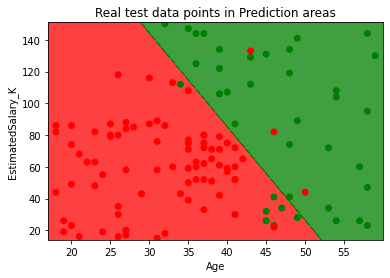

In [72]:
# so sánh giữa real test (điểm dữ liệu) và prediction test (phần xanh/đỏ)
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.Age.min()-1,stop=X_set.Age.max()+1,step=0.01), 
                    np.arange(start = X_set.EstimatedSalary_K.min()-1,stop=X_set.EstimatedSalary_K.max()+1,
                              step=0.01))
plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set.Age, X_set.EstimatedSalary_K, c=Y_set, cmap=ListedColormap(('red','green')))
plt.xlabel('Age')
plt.ylabel('EstimatedSalary_K')
plt.title('Real test data points in Prediction areas')
plt.show()

### Trực quan hóa 3

In [ ]:
X_now = [[40,120]]
Y_now = clf.predict(X_now)
Y_now